In [5]:
!pip3 install keras
!pip3 install tensorflow

![Drag Racing](https://i.ytimg.com/vi/MGS--dDzVr8/maxresdefault.jpg)

In [6]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

In [9]:
# input image dimensions
img_rows, img_cols = 64, 64


df_cat = pd.read_csv('../data/cat.csv',header=None).apply(pd.to_numeric)
df_dog = pd.read_csv('../data/dog.csv',header=None).apply(pd.to_numeric)
print(df_cat[0].describe())

num_cats = df_cat.values.shape[1]
num_dogs = df_dog.values.shape[1]
print("Cats:{} Dogs:{}".format(num_cats, num_dogs))

cats = df_cat.values.reshape((img_rows, img_cols, num_cats))
dogs = df_dog.values.reshape((img_rows, img_cols, num_dogs))
X = np.concatenate((cats,dogs), axis=2).swapaxes(2,0)
y = np.concatenate((np.zeros(num_cats),np.ones(num_dogs)))
print("Shapes X={} y={}".format(X.shape,y.shape))

count    4096.000000
mean       58.609619
std        63.548593
min         4.000000
25%        10.000000
50%        47.000000
75%        77.000000
max       248.000000
Name: 0, dtype: float64
Cats:80 Dogs:80
Shapes X=(160, 64, 64) y=(160,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Prepare data to feed the NN
num_classes = 2


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (128, 64, 64, 1)
128 train samples
32 test samples


In [12]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# Fit the NN
batch_size = 20
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 128 samples, validate on 32 samples
Epoch 1/10
128/128 [==============================] - 3s 21ms/step - loss: 0.7590 - acc: 0.5000 - val_loss: 0.6717 - val_acc: 0.6875
Epoch 2/10
128/128 [==============================] - 2s 15ms/step - loss: 0.6641 - acc: 0.6250 - val_loss: 0.6250 - val_acc: 0.5938
Epoch 3/10
128/128 [==============================] - 2s 16ms/step - loss: 0.6053 - acc: 0.7109 - val_loss: 0.5120 - val_acc: 0.6875
Epoch 4/10
128/128 [==============================] - 2s 18ms/step - loss: 0.5958 - acc: 0.7031 - val_loss: 0.5313 - val_acc: 0.8125
Epoch 5/10
128/128 [==============================] - 2s 16ms/step - loss: 0.4243 - acc: 0.8516 - val_loss: 2.2363 - val_acc: 0.5000
Epoch 6/10
128/128 [==============================] - 2s 17ms/step - loss: 0.8568 - acc: 0.7734 - val_loss: 0.3830 - val_acc: 0.8125
Epoch 7/10
128/128 [==============================] - 2s 15ms/step - loss: 0.2782 - acc: 0.9062 - val_loss: 0

In [14]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22437435388565063
Test accuracy: 0.90625


Probs -> Cat:0.13836 Dog:0.86164


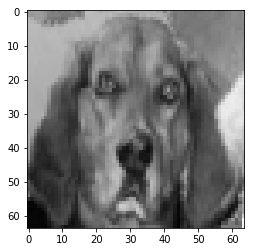

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[30]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(Image.fromarray(img.squeeze()*255),'gray')

(1, 64, 64, 1)
Probs -> Cat:0.24228 Dog:0.75772


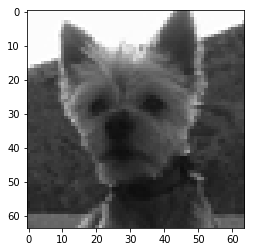

In [16]:
import matplotlib.pyplot as plt

df = pd.read_csv("../data/popino.csv",header=None).apply(pd.to_numeric)
img2 = df.values.reshape((64,64,1)).astype('float32') / 255
plt.imshow(Image.fromarray(img2.squeeze()*255),'gray')
print(np.expand_dims(img2,axis=0).shape)
pred2 = model.predict(np.expand_dims(img2,axis=0))[0]
print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred2[0],pred2[1]))


../data/faces_croped/guzman_garcia/5.jpg
Probs -> Cat:0.16848 Dog:0.83152
../data/faces_croped/cristina_rota/5.jpg
Probs -> Cat:0.59493 Dog:0.40507
../data/faces_croped/clara_piniella/5.jpg
Probs -> Cat:0.08734 Dog:0.91266
../data/faces_croped/cesar_castanon/5.jpg
Probs -> Cat:0.09499 Dog:0.90501
../data/faces_croped/maria_verdejo/5.jpg
Probs -> Cat:0.13300 Dog:0.86700
../data/faces_croped/alberto_vargas/5.jpg
Probs -> Cat:0.07136 Dog:0.92864
../data/faces_croped/julio_porto/5.jpg
Probs -> Cat:0.08945 Dog:0.91055
../data/faces_croped/alvaro_rivas/5.jpg
Probs -> Cat:0.16885 Dog:0.83115
../data/faces_croped/isa_gallego/5.jpg


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


Probs -> Cat:0.09207 Dog:0.90793
../data/faces_croped/david_fernandez/5.jpg
Probs -> Cat:0.61401 Dog:0.38599
../data/faces_croped/mario_bru/5.jpg
Probs -> Cat:0.28370 Dog:0.71630
../data/faces_croped/antonio_pons/5.jpg
Probs -> Cat:0.12328 Dog:0.87672
../data/faces_croped/alex_mendez/5.jpg
Probs -> Cat:0.04147 Dog:0.95853
../data/faces_croped/blanca_lluch/5.jpg
Probs -> Cat:0.17924 Dog:0.82076


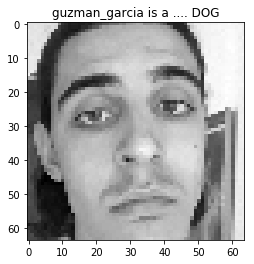

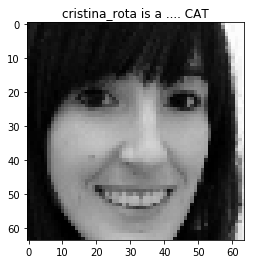

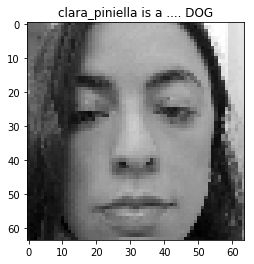

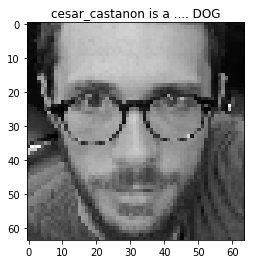

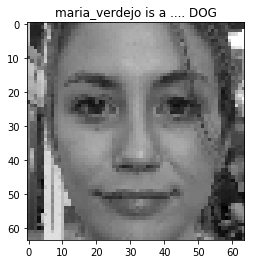

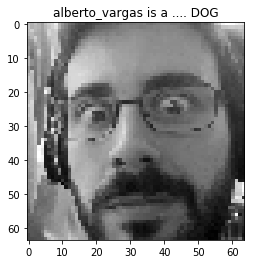

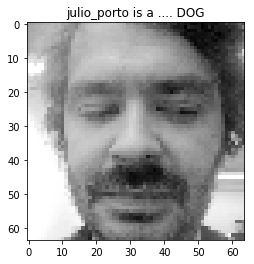

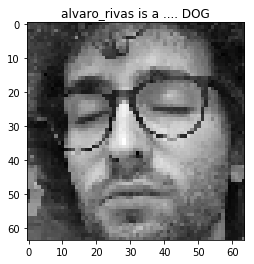

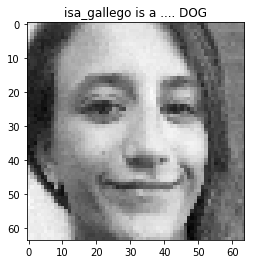

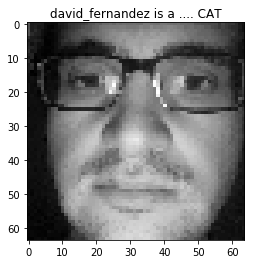

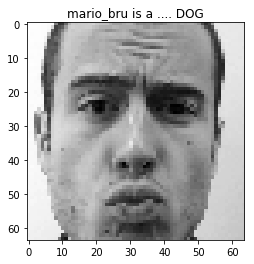

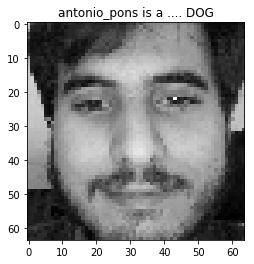

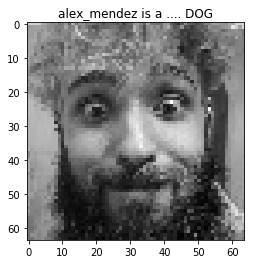

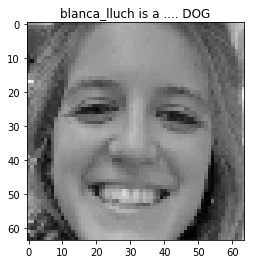

In [39]:
import cv2
import matplotlib.pyplot as plt

def predictCatOrDog(im):
    im = im / 255
    prepared_data = np.expand_dims(np.expand_dims(im,axis=3),axis=0)
    pred = model.predict(prepared_data)[0]
    print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
    return 'CAT' if pred[0]>pred[1] else 'DOG'


path = "../data/faces_croped"
import glob
import os
files = glob.glob('{}/*/5.jpg'.format(path))
for file in files:
    print(file)
    im = cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY),(64,64))
    plt.figure()
    plt.imshow(im,cmap="gray")
    answer= predictCatOrDog(im)
    personaje = file.split('/')[-2]
    plt.title(f"{personaje} is a .... {answer}")


In [51]:
for file in glob.glob('../data/animales/*.*'):
    im = cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY),(64,64))
    print(file)
    answer = predictCatOrDog(im)

../data/animales/cat_cristina_2.jpg
Probs -> Cat:0.70724 Dog:0.29276
../data/animales/dog_mer.JPG
Probs -> Cat:0.69835 Dog:0.30165
../data/animales/cat_guzman.jpg
Probs -> Cat:0.85957 Dog:0.14043
../data/animales/dog_celia.jpg
Probs -> Cat:0.68855 Dog:0.31145


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


../data/animales/dog_alex.jpg
Probs -> Cat:0.26333 Dog:0.73667
../data/animales/dog_blanca_alcala.png
Probs -> Cat:0.35169 Dog:0.64831
../data/animales/cat_felipe.png
Probs -> Cat:0.28137 Dog:0.71863
../data/animales/cat_obi.png
Probs -> Cat:0.38682 Dog:0.61318
../data/animales/dog_timon.jpg
Probs -> Cat:0.19259 Dog:0.80741
../data/animales/dog_kika_fran.jpg
Probs -> Cat:0.25769 Dog:0.74231
../data/animales/cat_julio.jpg
Probs -> Cat:0.94579 Dog:0.05421
../data/animales/cat_cristina.jpg
Probs -> Cat:0.35075 Dog:0.64925
